In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def detect_person_yolov3(image_name):
    # Load YOLO classes
    classes = None
    with open("coco.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]

    # Load YOLO model
    net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

    # Load the image
    image = cv2.imread(image_name)  # Replace 'your_image.jpg' with the path to your image

    # Prepare input blob and set input for YOLO network
    net.setInput(cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False))

    # Get output layer names
    output_layers = net.getUnconnectedOutLayersNames()

    # Forward pass through the network
    outs = net.forward(output_layers)

    # Initialize lists to store class IDs, confidences, and bounding boxes
    class_ids = []
    confidences = []
    boxes = []
    Width = image.shape[1]
    Height = image.shape[0]

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.1:  # Adjust the confidence threshold as needed
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # Apply non-maximum suppression to remove overlapping boxes
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)

    # Draw bounding boxes on the image for all detected objects and print confidence score and bounding box size
    for i in range(len(boxes)):
        if i in indices:
            box = boxes[i]
            if class_ids[i] == 0:
                class_id = class_ids[i]
                label = str(classes[class_id])
                confidence = confidences[i]
                color = (0, 0, 255)  # You can set different colors for different classes

                # Draw bounding box
                cv2.rectangle(image, (round(box[0]), round(box[1])), (round(box[0] + box[2]), round(box[1] + box[3])), color, 2)

                # Display class label and confidence score
                text = f"{label}: {confidence:.2f}"
                cv2.putText(image, text, (round(box[0]) - 10, round(box[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

                # Print bounding box size (width and height)
                bbox_size = (int(box[2]), int(box[3]))
                print(f"Object: {label}, Confidence: {confidence:.2f}, Bounding Box Size: {bbox_size}")

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

Object: person, Confidence: 0.99, Bounding Box Size: (428, 505)


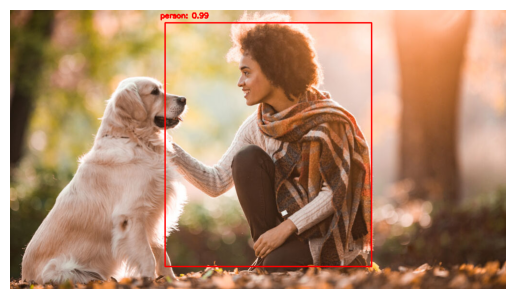

In [3]:
detect_person_yolov3("../Images/Person and dog.jpg")


Object: person, Confidence: 0.98, Bounding Box Size: (262, 284)


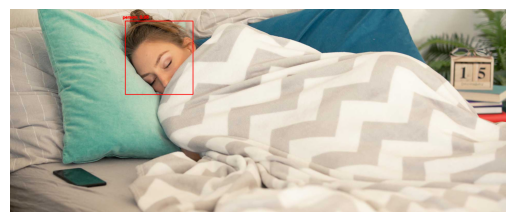

In [4]:
detect_person_yolov3("../Images/Person blanket.jpg")

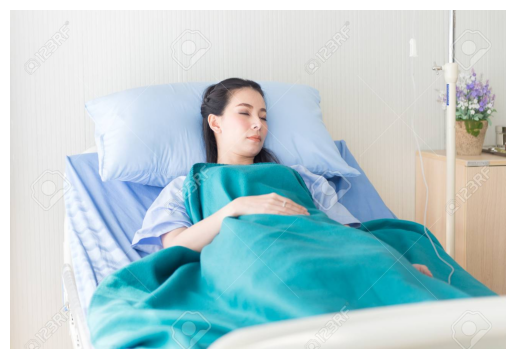

In [5]:
detect_person_yolov3("../Images/Person blanket 2.jpg")

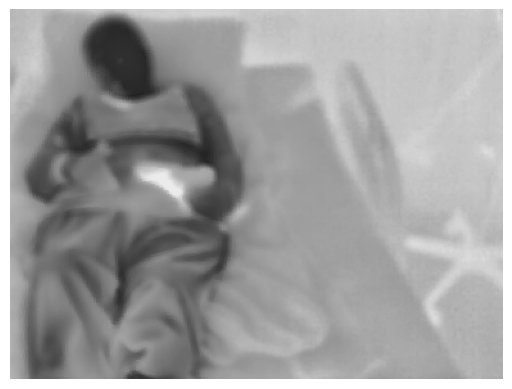

In [6]:
detect_person_yolov3("../Images/G170008_20230714103320353.bmp")

Object: person, Confidence: 0.66, Bounding Box Size: (179, 272)


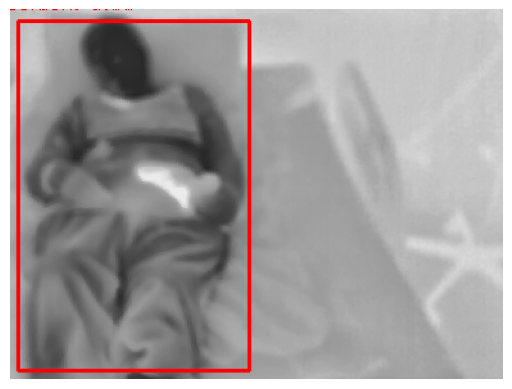

In [7]:
detect_person_yolov3("../Images/G170008_20230714104022091.bmp")

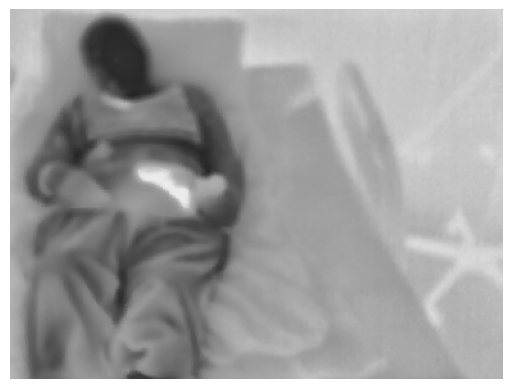

In [8]:
detect_person_yolov3("../Images/G170008_20230714104227139.bmp")

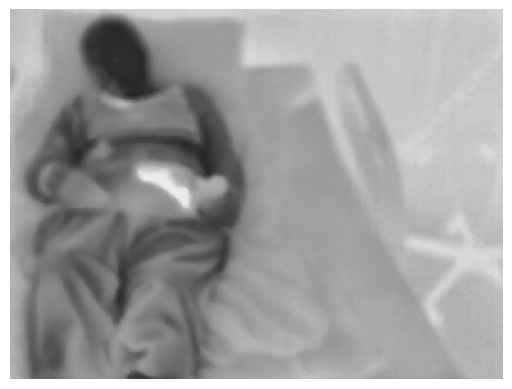

In [9]:
detect_person_yolov3("../Images/G170008_20230714104228957.bmp")

Object: person, Confidence: 0.80, Bounding Box Size: (335, 266)


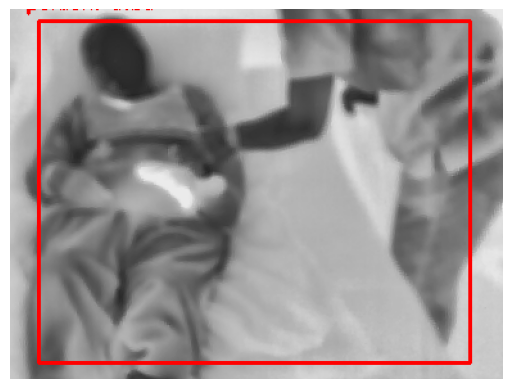

In [10]:
detect_person_yolov3("../Images/G170008_20230714104402709.bmp")

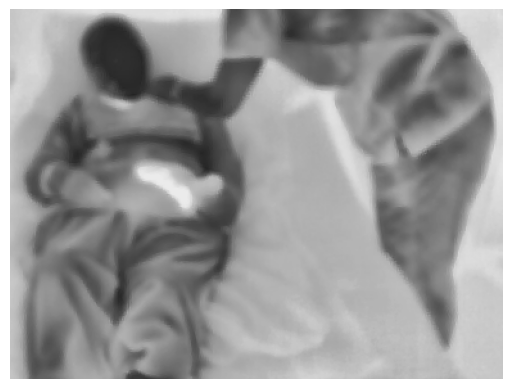

In [11]:
detect_person_yolov3("../Images/G170008_20230714104404532.bmp")

Object: person, Confidence: 0.84, Bounding Box Size: (584, 365)


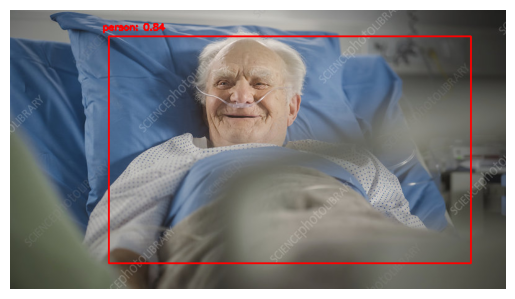

In [12]:
detect_person_yolov3("../Images/Old person.jpg")

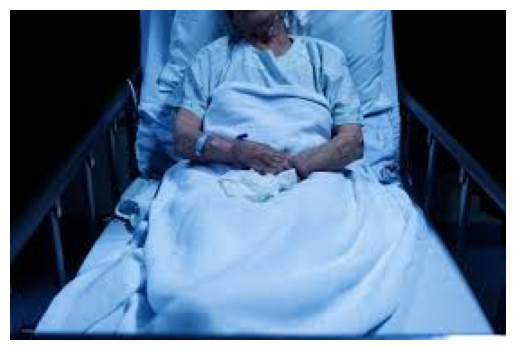

In [13]:
detect_person_yolov3("../Images/Person on the bed.jpg")

Object: person, Confidence: 0.99, Bounding Box Size: (754, 560)


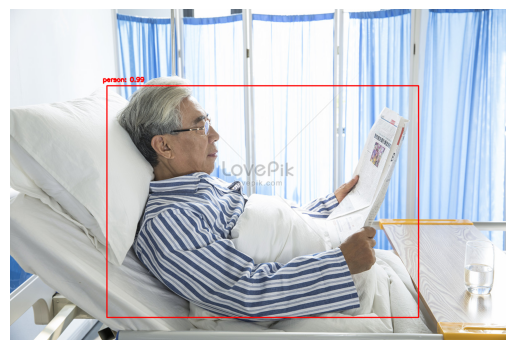

In [14]:
detect_person_yolov3("../Images/Person sIde angle.jpg")

Object: person, Confidence: 0.96, Bounding Box Size: (423, 202)


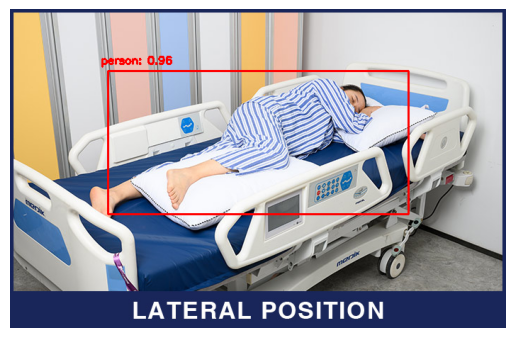

In [15]:
detect_person_yolov3("../Images/Lateral posItIon.jpg")

Object: person, Confidence: 0.41, Bounding Box Size: (225, 138)


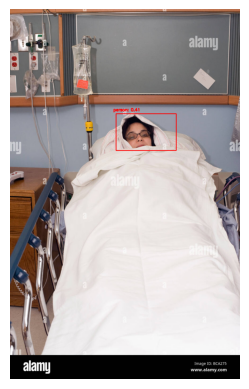

In [16]:
detect_person_yolov3("../Images/Person fully covered.jpg")

Object: person, Confidence: 1.00, Bounding Box Size: (114, 235)


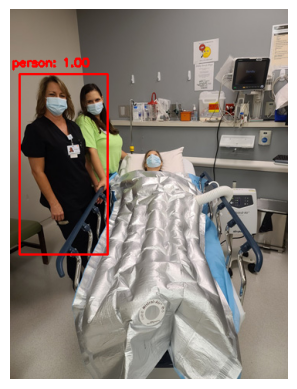

In [17]:
detect_person_yolov3("../Images/Person wIth two Nurse.jpg")

Object: person, Confidence: 0.97, Bounding Box Size: (555, 265)


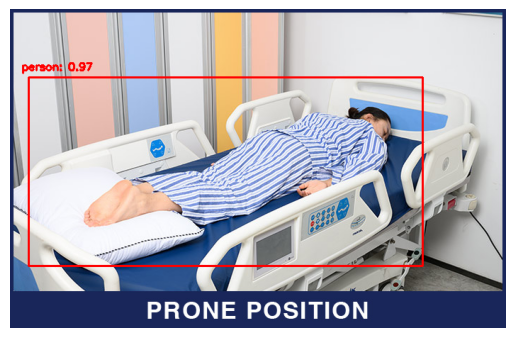

In [18]:
detect_person_yolov3("../Images/Prone posItIon.jpg")

Object: person, Confidence: 0.94, Bounding Box Size: (394, 221)
Object: person, Confidence: 0.36, Bounding Box Size: (95, 89)


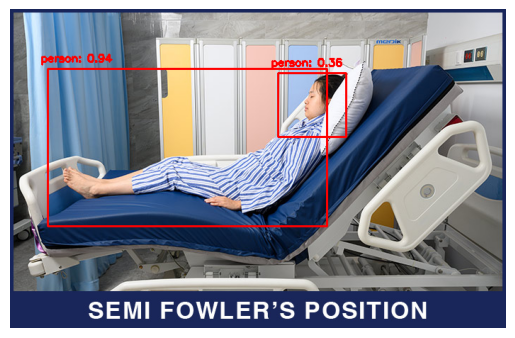

In [19]:
detect_person_yolov3("../Images/SemI fowler posItIon.jpg")

Object: person, Confidence: 0.97, Bounding Box Size: (426, 326)


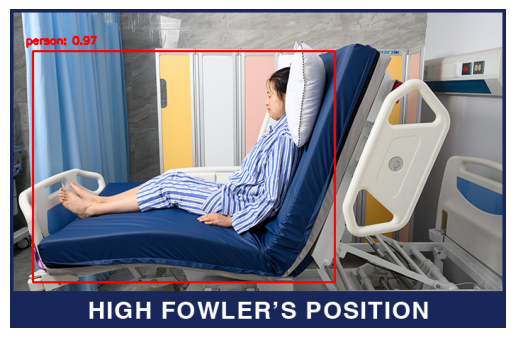

In [20]:
detect_person_yolov3("../Images/HIgh Fowler posItIon.jpg")

Object: person, Confidence: 0.96, Bounding Box Size: (550, 239)


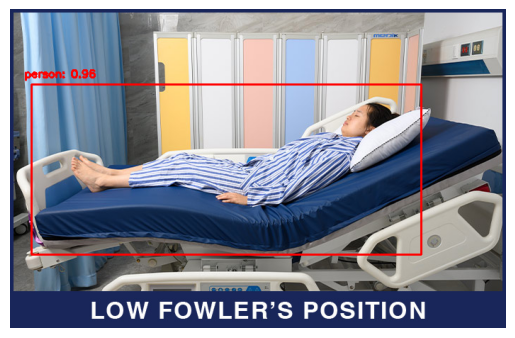

In [21]:
detect_person_yolov3("../Images/low fowler posItIon.jpg")

Object: person, Confidence: 0.75, Bounding Box Size: (117, 86)
Object: person, Confidence: 0.99, Bounding Box Size: (79, 131)


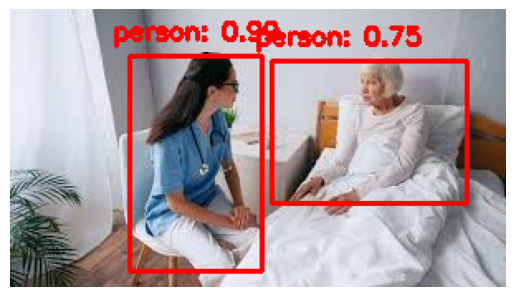

In [22]:
detect_person_yolov3("../Images/Two Person.jpg")

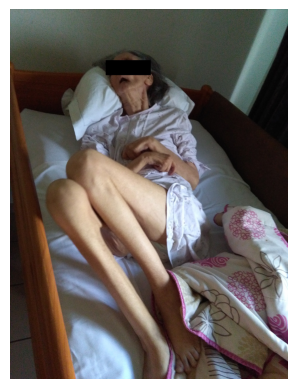

In [23]:
detect_person_yolov3("../Images/Lateral posItIon_foldedleg.jpg")

Object: person, Confidence: 0.74, Bounding Box Size: (247, 429)


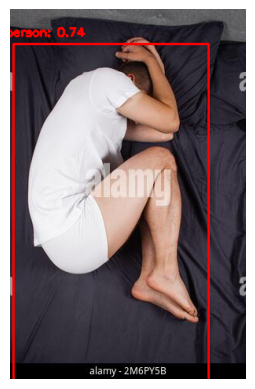

In [24]:
detect_person_yolov3("../Images/Covered.jpg")

Object: person, Confidence: 1.00, Bounding Box Size: (192, 331)


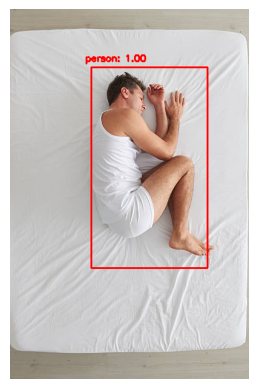

In [25]:
detect_person_yolov3("../Images/Contorded_posItIon.jpg")

Object: person, Confidence: 1.00, Bounding Box Size: (998, 212)


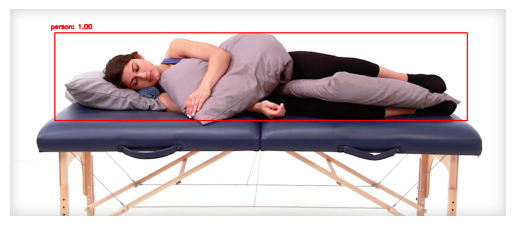

In [26]:
detect_person_yolov3("../Images/Contorded_posItIon2.jpg")

Object: person, Confidence: 1.00, Bounding Box Size: (439, 425)


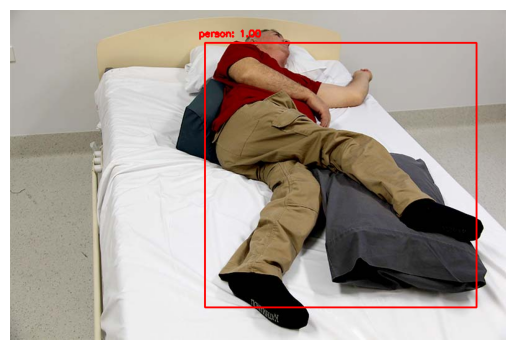

In [27]:
detect_person_yolov3("../Images/Contorded_posItIon3.jpg")

Object: person, Confidence: 0.97, Bounding Box Size: (199, 160)


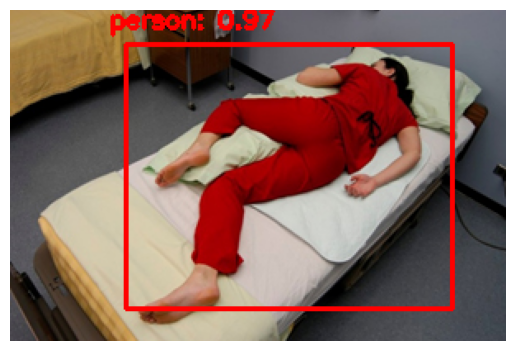

In [28]:
detect_person_yolov3("../Images/Contorded_posItIon4.jpg")

Object: person, Confidence: 0.93, Bounding Box Size: (180, 200)


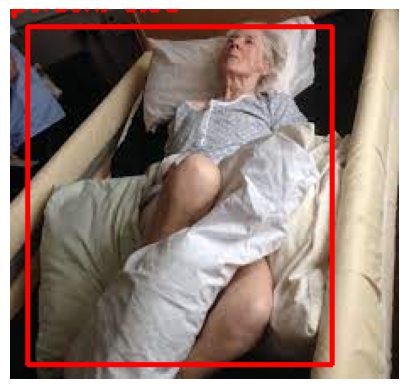

In [29]:
detect_person_yolov3("../Images/Old_person_blurr.jpg")

Object: person, Confidence: 0.63, Bounding Box Size: (70, 162)


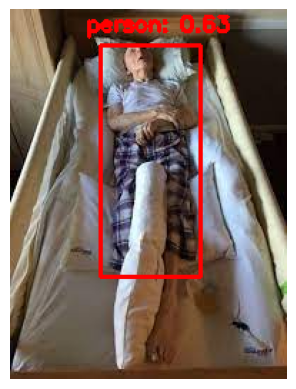

In [30]:
detect_person_yolov3("../Images/old_person_wIth pIllow.jpg")

Object: person, Confidence: 0.22, Bounding Box Size: (141, 270)


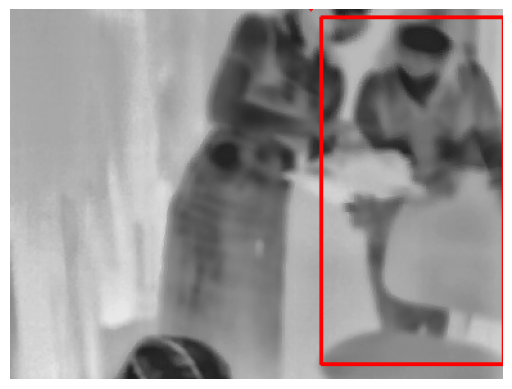

In [31]:
detect_person_yolov3("../Images/New1.bmp")

Object: person, Confidence: 0.81, Bounding Box Size: (142, 275)
Object: person, Confidence: 0.73, Bounding Box Size: (199, 256)


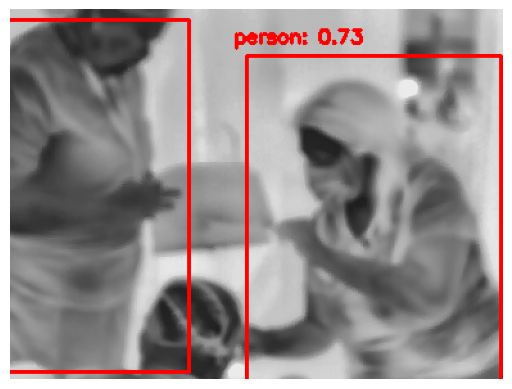

In [32]:
detect_person_yolov3("../Images/New2.bmp")

Object: person, Confidence: 1.00, Bounding Box Size: (178, 248)


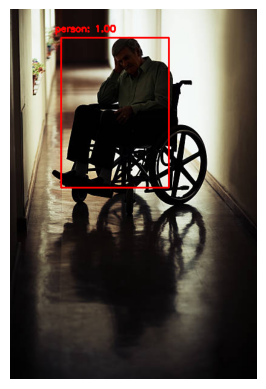

In [33]:
detect_person_yolov3("../Images/WheelchaIr1.jpg")

Object: person, Confidence: 0.82, Bounding Box Size: (260, 213)


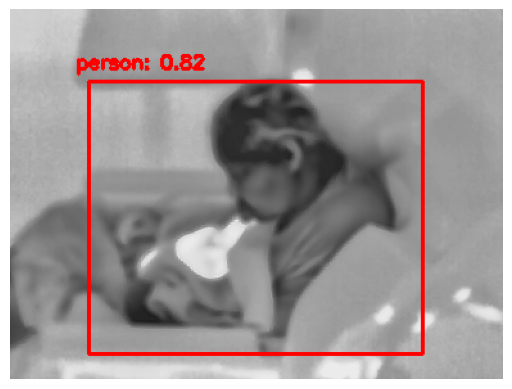

In [34]:
detect_person_yolov3("../Images/WheelchaIr2.bmp")

Object: person, Confidence: 0.48, Bounding Box Size: (337, 242)


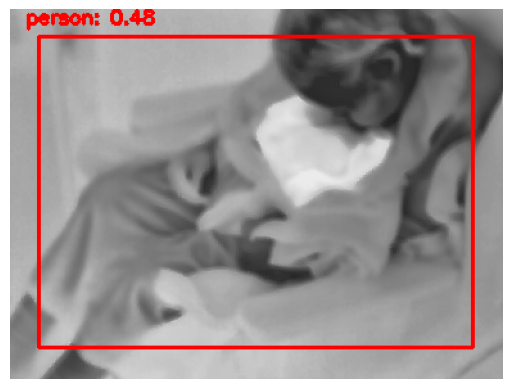

In [35]:
detect_person_yolov3("../Images/WheelchaIr3.bmp")

Object: person, Confidence: 0.86, Bounding Box Size: (264, 231)


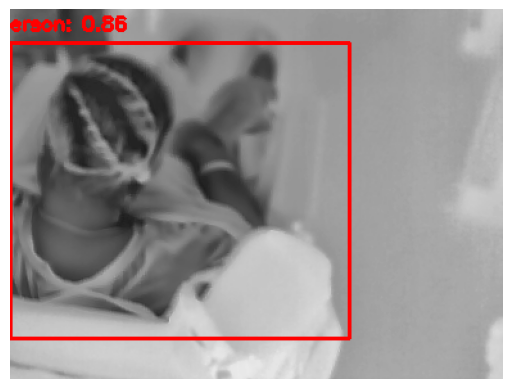

In [36]:
detect_person_yolov3("../Images/WheelchaIr4.bmp")